## Corona Virus analysis using 'Novel Corona Virus 2019-20 Dataset'

As Github does not support folium map and some rendering techniques, so if you want to see fully rendered notebook, click on below link
https://nbviewer.jupyter.org/github/Mr-Piyush-Kumar/Projects/blob/master/Corona_virus_analysis/CoronaVirusAnalysis.ipynb

### 1. Introduction

### 1.1 Background

From World Health Organization - On 31 December 2019, WHO was alerted to several cases of pneumonia in Wuhan City, Hubei   Province of China. The virus did not match any other known virus. This raised concern because when a virus is new, we do not know how it affects people.

So daily level information on the affected people can give some interesting insights when it is made available to the broader data science community.

### 2. Data acquisition and cleaning

All dataset will be download from below Kaggle webpages. 
                         
Corona Virus dataset <a href = 'https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset'>from here</a>  
World Coordinates dataset <a href = 'https://www.kaggle.com/parulpandey/world-coordinates'>from here</a>  
World geoJson file <a href = 'https://www.kaggle.com/sandeep04201988/worldcountries'>from here</a>  
China geoJson file <a href = 'https://www.kaggle.com/gpreda/china-regions-map'>from here</a>

In [1]:
# Downlodaing Corona Virus Dataset

!pip install wget

import wget
url = 'https://storage.googleapis.com/kagglesdsdata/datasets/494724/966440/2019_nCoV_data.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1582868558&Signature=JXjN269XVMhWbNH3BAyQozqwNFBePHHrrxpRMk%2BpD3ANojzrkvE5Qer9z1fk1uprgM0njfohll0yPHB8mZs4eN0Ucke7I4JtTTRyISKFWSO%2FCcDZanS9pWX%2FdnEBUV6QindIhmE%2FZeeeRAeKx%2Fd8h3RGlHpCeBm6%2BN7L6XnZj8N%2FsxlmIz%2FXwbxc%2BW2VRi4pG1P0AmJI5PjIc5OVcQISdy0RCGDaJuhAGm4TTarYuZt9j36rFlheXNXitn2EeutI4OI%2B%2BBqTV7fIR5mdBXCa1%2FKiutt3Lu%2BffT7N62dlMXLR4Z0aga4OvzzzwdVuf7TbLWBpqcx6LTQGGD03Fj5kEw%3D%3D&response-content-disposition=attachment%3B+filename%3D2019_nCoV_data.csv'
file = wget.download(url)
print('file name = ',file)


file name =  2019_nCoV_data.csv


In [2]:
# Downloading word-coordinates data for visulization on world map

url1 = 'https://storage.googleapis.com/kagglesdsdata/datasets/500356/927175/world_coordinates.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1582868625&Signature=soCAku6MmJLB%2FL48Oxs%2FSxaPP11EASBJG%2BPMCRfhPcavNJBDhviiE12SKcfAje07vuDsWsuRiUxRu61KgBObNNe2brA9JHiEL4I4D1dgYk%2F6SKLJz6RFWCwYnr5b%2FAiHfQW2dLxNtRF35MEfR4ncnOW0FHLzgSTd8wq12QrV6y9%2B8XAOyjwcFdkCnLk0eTws0ERhUMC0CSeqFXqkS7leuBxSAUW2jUblrLvir3938JSZ2aqqbywj4eIT5jy0XvmpxepDsYOu1kJpkkyKq4lzyWTwNmr5ljZGWSoJrOVMAIU17z%2FnI3Is2s2YyysoUI6I0XoXRPqyN%2B8pZy0%2F0GPw1Q%3D%3D&response-content-disposition=attachment%3B+filename%3Dworld_coordinates.csv'
file1 = wget.download(url1)
print('file name = ',file1)


file name =  world_coordinates.csv


In [3]:
# downloading world geoJson file to draw choropleth map of world

url2 = 'https://storage.googleapis.com/kagglesdsdata/datasets/7923/11172/world-countries.json?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1582868666&Signature=ca8CoGxJ1mYdOR%2BKnaYdfO5mW15iNPvFWNOElOCDMUMRAU4wfO9G2W5980D6zYDFO94SrgiFm07enAWeuF3SmUF5XuU70bn%2FDID%2F%2F2%2FU4JHE00szhJWsIyLHm66R%2FInBNR4Wqg1OYgA0qlqw6Ewy9%2F0jAl4P%2Bv62voX7oO1rI%2BEGPwS0DBaHsUHCGwL4GNdxjJJ%2Ba05c6jpksTvP4V%2FWk%2FvLeyGOMa%2BE5FzExHInBlbiCCPX5bsUo%2BjG87kpIokoSIt2eoP7fiVzPnhB6Z83Td3zwr5ld0gJA%2FyxXagrDbB70JwmdgVO%2B3k2%2BySZqgev%2F6rLk7Lm%2FJFy%2B6ZMgPIVcw%3D%3D&response-content-disposition=attachment%3B+filename%3Dworld-countries.json'
file2 = wget.download(url2)
print('file name = ',file2)


file name =  world-countries.json


In [4]:
# downloading china geoJson file to draw choropleth map of China

url3 = 'https://storage.googleapis.com/kagglesdsdata/datasets/496669/922532/china.json?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1582868706&Signature=L4Xo4fynYwWPvUio3j1NWc4sQBFeAje1N3kZ4%2BzrLJdFZsQiyMJB3lisf%2FVS%2BD7Kq0Pe0aCgxhS1tpmaTbQFF87255Fy%2B7In%2BJOJZnmytgc8NGc6m9ZaOlzuLkgoAT3tgfLYWmRcWLvvBl1cdAArfhl%2BibxSl7%2BbjNvGo3Q0XolnhfdjKZCZ5egh%2FmSV8HUfrf0OBm0%2BXbUEcmV4wkJm8RM8UFSvE1t5HFrhvzO29WmZm9rcwiHKuLPxjl3KGtXpp4ysTJPpScM50UyAgWcrZH1LYeARmGhbnGRarblLGfeHoj2sbO9Nh%2FQAd5XmiNEMtdxTnR99p65Dd07v76979Q%3D%3D&response-content-disposition=attachment%3B+filename%3Dchina.json'
file3 = wget.download(url3)
print('file name = ',file3)


file name =  china.json


In [5]:
# loading corona virus dataset as Pandas Dataframe
import pandas as pd

corona_df = pd.read_csv('2019_nCoV_data.csv')
corona_df.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0


**Corona Dataset columns decription:-**

- Sno:- Serial Number.  
- Date:- In which date and time, a particular record wrote in the dataset.  
- Province/State:- Province/State name of belonging country.  
- Country:- Country Name.  
- Last Update:- At what time, last case was observed in a particular day.  
- Confirmed:- No. of confirmed infected people till now in a particular  location (Representing Cumulative Sum).  
- Deaths:- No. of deaths till now due to Corona virus in a particular  location (Representing Cumulative Sum).  
- Recovered:- No. of recovered people till now who was infected in a particular  location (Representing Cumulative Sum).  

In [6]:
# loading both geoJson files

world_geoJson = 'world-countries.json' # Path to file
china_geoJson = 'china.json' # Path to file

**About geoJson file**

GeoJSON is an open standard geospatial data interchange format that represents simple geographic features and their nonspatial attributes. Based on JavaScript Object Notation (JSON), GeoJSON is a format for encoding a variety of geographic data structures. It uses a geographic coordinate reference system, World Geodetic System 1984, and units of decimal degrees.

<a href = 'https://doc.arcgis.com/en/arcgis-online/reference/geojson.htm'>Read more about geoJson file from here.</a>

I will use these two files to show choropleth map of world as well as of china to representing corona virus outbreak location wise.

<a href='https://en.wikipedia.org/wiki/Choropleth_map'>Read about choropleth map from here.</a>

### Data Cleaning

dropping Sno. from Dataset as it's not required for analysis.

In [7]:
corona_df.drop('Sno',axis=1,inplace=True)
corona_df.head()

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0


In [8]:
corona_df.Country.unique()

array(['China', 'US', 'Japan', 'Thailand', 'South Korea',
       'Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore',
       'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico',
       'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka',
       'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates',
       'India', 'Italy', 'Sweden', 'Russia', 'Spain', 'UK', 'Belgium',
       'Others', 'Egypt'], dtype=object)

China and Mainland China are representing as two different countries in dataset. Lets replace Mainland china with China.

In [9]:
corona_df.replace('Mainland China','China',inplace=True)
corona_df.Country.unique()

array(['China', 'US', 'Japan', 'Thailand', 'South Korea', 'Hong Kong',
       'Macau', 'Taiwan', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'France', 'Nepal',
       'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany',
       'Finland', 'United Arab Emirates', 'India', 'Italy', 'Sweden',
       'Russia', 'Spain', 'UK', 'Belgium', 'Others', 'Egypt'],
      dtype=object)

In Country column, there is one value 'Others'. As I have no information about how many countries are grouped as Others so I am going to drop those rows from dataset having country value Others.

In [10]:
corona_df = corona_df[corona_df['Country']!='Others'].reset_index(drop=True)
corona_df

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1703,02/17/2020 22:00:00,"Madison, WI",US,2020-02-05T21:53:02,1.0,0.0,0.0
1704,02/17/2020 22:00:00,"Orange, CA",US,2020-02-01T19:53:03,1.0,0.0,0.0
1705,02/17/2020 22:00:00,"San Antonio, TX",US,2020-02-13T18:53:02,1.0,0.0,0.0
1706,02/17/2020 22:00:00,"Seattle, WA",US,2020-02-09T07:03:04,1.0,0.0,1.0


### 3. Data Analysis

**Handling NaN values**

In [11]:
# shape of our dataset
corona_df.shape

(1708, 7)

total no of 1719 records are there in corona dataset.

In [12]:
# looking for null values present in corona datset

corona_df.isna().sum()

Date                0
Province/State    462
Country             0
Last Update         0
Confirmed           0
Deaths              0
Recovered           0
dtype: int64

In Province/State columns total 462 records have null value.

In [13]:
import numpy as np

corona_province_nan = corona_df[corona_df['Province/State'].isna()]
corona_province_nan

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
35,01/22/2020 12:00:00,NaN,Japan,01/22/2020 12:00:00,2.0,0.0,0.0
36,01/22/2020 12:00:00,NaN,Thailand,01/22/2020 12:00:00,2.0,0.0,0.0
37,01/22/2020 12:00:00,NaN,South Korea,01/22/2020 12:00:00,1.0,0.0,0.0
73,01/23/2020 12:00:00,NaN,Japan,01/23/2020 12:00:00,1.0,0.0,0.0
74,01/23/2020 12:00:00,NaN,Thailand,01/23/2020 12:00:00,3.0,0.0,0.0
...,...,...,...,...,...,...,...
1695,02/17/2020 22:00:00,NaN,Egypt,2020-02-14T23:53:02,1.0,0.0,0.0
1696,02/17/2020 22:00:00,NaN,Finland,2020-02-12T00:03:12,1.0,0.0,1.0
1698,02/17/2020 22:00:00,NaN,Nepal,2020-02-12T14:43:03,1.0,0.0,1.0
1699,02/17/2020 22:00:00,NaN,Sri Lanka,2020-02-08T03:43:03,1.0,0.0,1.0


In [14]:
corona_province_nan.Confirmed.unique()

array([ 2.,  1.,  3.,  0.,  5.,  7.,  4.,  8., 14., 11., 10.,  6., 17.,
       19., 16., 20., 18., 15., 12., 25., 24., 22., 28., 45., 23., 30.,
       13., 40., 32., 43., 27., 26., 47., 33., 50.,  9., 58., 67., 29.,
       72., 75., 59., 34., 77., 66., 35.])

So the conclusion is that if a country has low no. of cases then dataset creators didn't divide country data into Province/State.

Replacing Nan Values with respective country name.

In [15]:
pd.options.mode.chained_assignment = None # avoiding setting with copy warning
corona_df['Province/State'][corona_df['Province/State'].isna()] = corona_df['Country']

In [16]:
print('Total',len(corona_df.Country.unique()),'countries have been affected by corona virus till now.')

Total 32 countries have been affected by corona virus till now.


In [17]:
# total cases till now country wise

countrywise_df = corona_df.groupby(['Country','Province/State']).max()
countrywise_df.reset_index(inplace = True)
countrywise_df = countrywise_df.groupby('Country').sum()
countrywise_df.reset_index(inplace = True)
countrywise_df

,Country,Confirmed,Deaths,Recovered
0,Australia,19.0,0.0,10.0
1,Belgium,1.0,0.0,1.0
2,Brazil,0.0,0.0,0.0
3,Cambodia,1.0,0.0,1.0
4,Canada,11.0,0.0,1.0
5,China,72366.0,1864.0,12455.0
6,Egypt,1.0,0.0,0.0
7,Finland,1.0,0.0,1.0
8,France,12.0,1.0,4.0
9,Germany,23.0,0.0,1.0


China is most affected by Corona virus.

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

### **Visualizing spreading of corona virus from beginning to till now. day by day** 

as we have per day data of each country so there is no problem in it.

In [19]:
Day_wise_world_data = corona_df.groupby('Date').sum().reset_index()
Day_wise_world_data

,Date,Confirmed,Deaths,Recovered
0,01/22/2020 12:00:00,555.0,0.0,0.0
1,01/23/2020 12:00:00,653.0,18.0,30.0
2,01/24/2020 12:00:00,941.0,26.0,36.0
3,01/25/2020 22:00:00,2019.0,56.0,49.0
4,01/26/2020 23:00:00,2794.0,80.0,54.0
5,01/27/2020 20:30:00,4473.0,107.0,63.0
6,01/28/2020 23:00:00,6057.0,132.0,110.0
7,01/29/2020 21:00:00,7783.0,170.0,133.0
8,01/30/2020 21:30:00,9776.0,213.0,187.0
9,01/31/2020 19:00:00,11374.0,259.0,252.0


In [20]:
Day_wise_china_data = corona_df[corona_df['Country']=='China'].groupby('Date').sum().reset_index()
Day_wise_china_data

,Date,Confirmed,Deaths,Recovered
0,01/22/2020 12:00:00,549.0,0.0,0.0
1,01/23/2020 12:00:00,639.0,18.0,30.0
2,01/24/2020 12:00:00,916.0,26.0,36.0
3,01/25/2020 22:00:00,1979.0,56.0,49.0
4,01/26/2020 23:00:00,2737.0,80.0,51.0
5,01/27/2020 20:30:00,4409.0,107.0,60.0
6,01/28/2020 23:00:00,5970.0,132.0,104.0
7,01/29/2020 21:00:00,7678.0,170.0,127.0
8,01/30/2020 21:30:00,9658.0,213.0,179.0
9,01/31/2020 19:00:00,11221.0,259.0,242.0


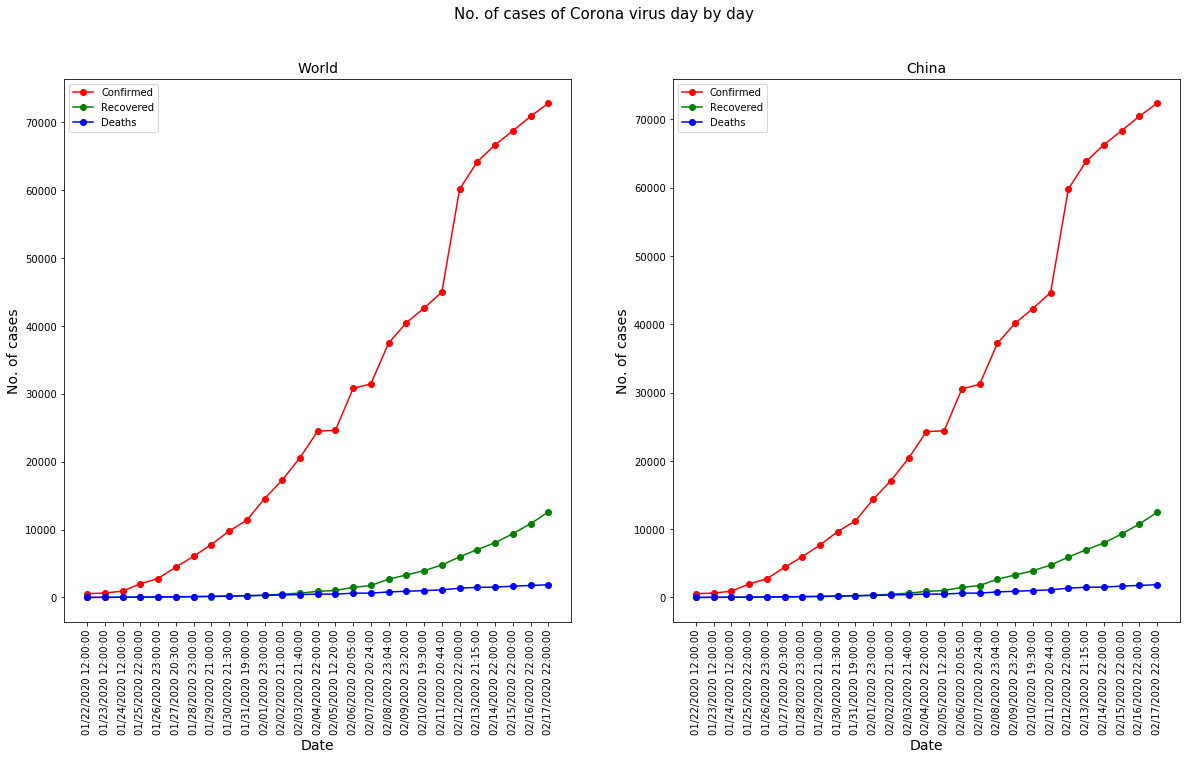

In [21]:
# World
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(Day_wise_world_data.Date,Day_wise_world_data.Confirmed,label='Confirmed',color='r',marker='o')
plt.plot(Day_wise_world_data.Date,Day_wise_world_data.Recovered,label='Recovered',color='g',marker='o')
plt.plot(Day_wise_world_data.Date,Day_wise_world_data.Deaths,label='Deaths',color='b',marker='o')
plt.title('World',size=14)
plt.legend()
plt.xticks(rotation=90)
plt.xlabel('Date',size=14)
plt.ylabel('No. of cases',size=14)

# China
plt.subplot(1,2,2)
plt.plot(Day_wise_china_data.Date,Day_wise_china_data.Confirmed,label='Confirmed',color='r',marker='o')
plt.plot(Day_wise_china_data.Date,Day_wise_china_data.Recovered,label='Recovered',color='g',marker='o')
plt.plot(Day_wise_china_data.Date,Day_wise_china_data.Deaths,label='Deaths',color='b',marker='o')
plt.title('China',size=14)
plt.legend()
plt.xticks(rotation=90)
plt.xlabel('Date',size=14)
plt.ylabel('No. of cases',size=14)
plt.suptitle('No. of cases of Corona virus day by day',size=15)
plt.show()

The pattern of spreading of corona virus is same for both whole world and China, it's because mostly Chinese people are affected by corona virus and whole world data is totally depend on what is happening in China.

So we can find hidden pattern in Corona virus dataset using only Chinese Data.

No. of confirmed cases are increasing exponentially but recovery is not fast as it should be.

### **Analyzing China Data State wise**

In [22]:
China_data = corona_df[corona_df['Country']=='China']
China_data.head()

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0


In [23]:
China_data_state_wise = China_data.groupby('Province/State').max().reset_index()
China_data_state_wise.head()

,Province/State,Date,Country,Last Update,Confirmed,Deaths,Recovered
0,Anhui,02/17/2020 22:00:00,China,2020-09-02 01:23:00,973.0,6.0,280.0
1,Beijing,02/17/2020 22:00:00,China,2020-09-02 03:43:00,381.0,4.0,114.0
2,Chongqing,02/17/2020 22:00:00,China,2020-09-02 00:43:00,553.0,5.0,225.0
3,Fujian,02/17/2020 22:00:00,China,2020-09-02 03:43:00,290.0,1.0,90.0
4,Gansu,02/17/2020 22:00:00,China,2020-08-02 15:13:00,91.0,2.0,58.0


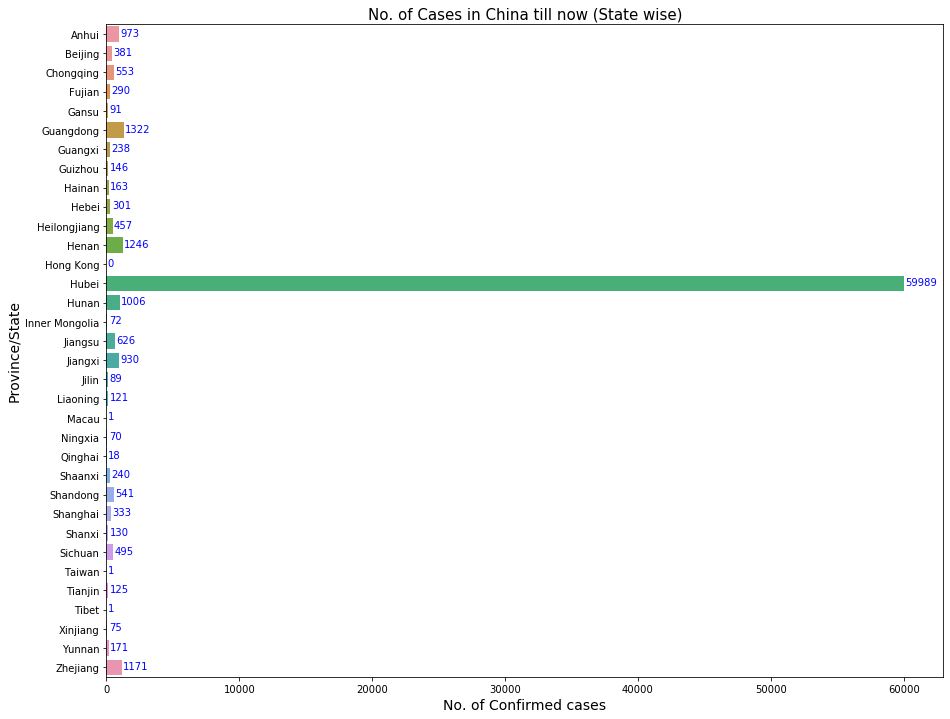

In [24]:
plt.figure(figsize=(15,12))
ax = sns.barplot(x='Confirmed',y='Province/State',data=China_data_state_wise,errwidth=0)
plt.title('No. of Cases in China till now (State wise)',size=15)
plt.xlabel('No. of Confirmed cases',size=14)
plt.ylabel('Province/State',size=14)

y=0
for p in ax.patches :
   ax.annotate(str(int(p.get_width())),(p.get_width()+100,y+0.1),color='b')
   y+=1

Hubei province is most affected by Corona virus in China, as corona virus started from Wuhan city which is in Hubei province.

In [25]:
Country_wise_except_china = countrywise_df[countrywise_df['Country']!='China']
Country_wise_except_china.head()

,Country,Confirmed,Deaths,Recovered
0,Australia,19.0,0.0,10.0
1,Belgium,1.0,0.0,1.0
2,Brazil,0.0,0.0,0.0
3,Cambodia,1.0,0.0,1.0
4,Canada,11.0,0.0,1.0


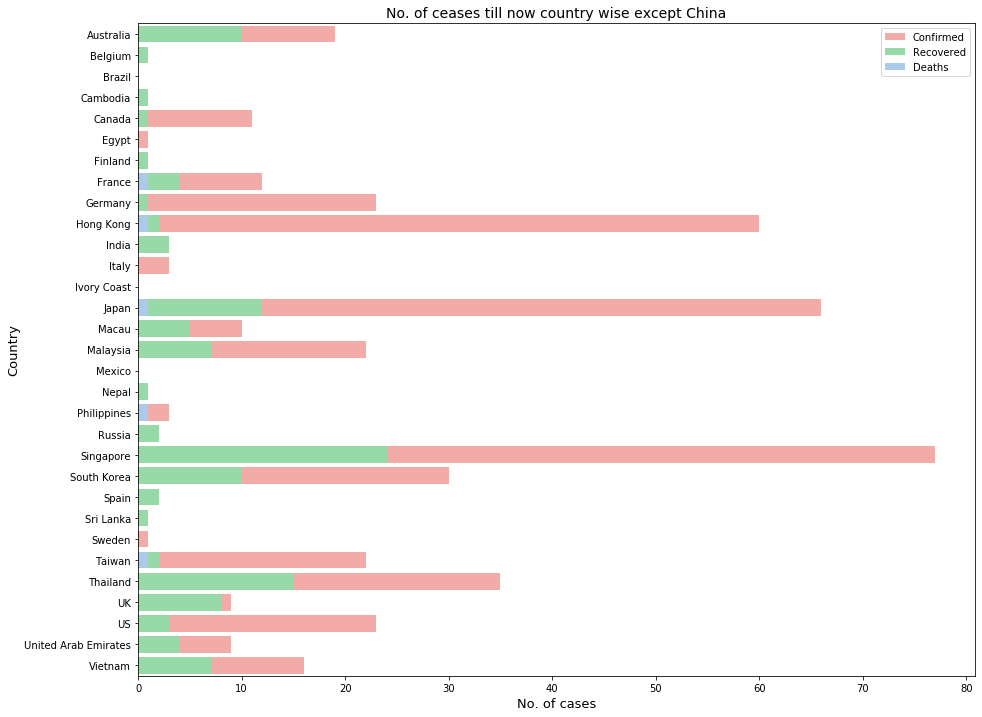

In [26]:
plt.figure(figsize=(15,12))
sns.set_color_codes('pastel')
sns.barplot(x='Confirmed',y='Country',data=Country_wise_except_china,errwidth=0,color='r',label='Confirmed')
sns.barplot(x='Recovered',y='Country',data=Country_wise_except_china,errwidth=0,color='g',label='Recovered')
sns.barplot(x='Deaths',y='Country',data=Country_wise_except_china,errwidth=0,color='b',label='Deaths')
plt.title('No. of ceases till now country wise except China',size=14)
plt.xlabel('No. of cases',size=13)
plt.ylabel('Country',size=13)
plt.legend()
plt.show()

### **Geographical Visualization**

For Geographical Visualization I am using Folium library

In [27]:
!pip install folium==0.10

     |████████████████████████████████| 92kB 5.7MB/s eta 0:00:011
  Found existing installation: folium 0.5.0
    Uninstalling folium-0.5.0:
      Successfully uninstalled folium-0.5.0


In [28]:
import folium as flm

In [29]:
# loading world coordinates file

world_coordinates = pd.read_csv('world_coordinates.csv')
world_coordinates.head()                                

,Code,Country,latitude,longitude
0,AD,Andorra,42.546245,1.601554
1,AE,United Arab Emirates,23.424076,53.847818
2,AF,Afghanistan,33.939110,67.709953
3,AG,Antigua and Barbuda,17.060816,-61.796428
4,AI,Anguilla,18.220554,-63.068615


dropping code from world_coordinates Dataframe

In [30]:
world_coordinates.drop('Code',axis=1,inplace=True)
world_coordinates.head()

,Country,latitude,longitude
0,Andorra,42.546245,1.601554
1,United Arab Emirates,23.424076,53.847818
2,Afghanistan,33.939110,67.709953
3,Antigua and Barbuda,17.060816,-61.796428
4,Anguilla,18.220554,-63.068615


Merging world_coordinates with country wise df

In [31]:
corona_df_with_geo_location = countrywise_df.merge(world_coordinates,how='left',on='Country')
corona_df_with_geo_location

,Country,Confirmed,Deaths,Recovered,latitude,longitude
0,Australia,19.0,0.0,10.0,-25.274398,133.775136
1,Belgium,1.0,0.0,1.0,50.503887,4.469936
2,Brazil,0.0,0.0,0.0,-14.235004,-51.925280
3,Cambodia,1.0,0.0,1.0,12.565679,104.990963
4,Canada,11.0,0.0,1.0,56.130366,-106.346771
5,China,72366.0,1864.0,12455.0,35.861660,104.195397
6,Egypt,1.0,0.0,0.0,26.820553,30.802498
7,Finland,1.0,0.0,1.0,61.924110,25.748151
8,France,12.0,1.0,4.0,46.227638,2.213749
9,Germany,23.0,0.0,1.0,51.165691,10.451526


In [32]:
# dropping rows with NaN values
corona_df_with_geo_location.dropna(axis=0,inplace=True)
corona_df_with_geo_location

,Country,Confirmed,Deaths,Recovered,latitude,longitude
0,Australia,19.0,0.0,10.0,-25.274398,133.775136
1,Belgium,1.0,0.0,1.0,50.503887,4.469936
2,Brazil,0.0,0.0,0.0,-14.235004,-51.925280
3,Cambodia,1.0,0.0,1.0,12.565679,104.990963
4,Canada,11.0,0.0,1.0,56.130366,-106.346771
5,China,72366.0,1864.0,12455.0,35.861660,104.195397
6,Egypt,1.0,0.0,0.0,26.820553,30.802498
7,Finland,1.0,0.0,1.0,61.924110,25.748151
8,France,12.0,1.0,4.0,46.227638,2.213749
9,Germany,23.0,0.0,1.0,51.165691,10.451526


In [33]:
world_map = flm.Map(location=[10,-10],zoom_start=2)
for country,confirmed,lat,lng in zip(corona_df_with_geo_location.Country,
                                     corona_df_with_geo_location.Confirmed,
                                     corona_df_with_geo_location.latitude,
                                     corona_df_with_geo_location.longitude):
    
    flm.CircleMarker(
                      location=[lat,lng],
                      radius=5,
                      tooltip=str(confirmed),
                      fill=True,
                      fill_color='red',
                      fill_opacity=0.8).add_to(world_map)
world_map

In the above world map circle marker presents that these countries have been affected by corona virus.

**Choropleth map**

In [34]:
myscale = [0,15000,30000,45000,60000,73090] # manually defining threshold scale

choropleth_map = flm.Map(location=[10,-10],zoom_start=2)


flm.Choropleth(
                           geo_data = world_geoJson,
                           data = corona_df_with_geo_location,
                           columns = ['Country','Confirmed'],
                           key_on='feature.properties.name',
                           fill_color= 'YlOrRd',
                           fill_opacity=0.7, 
                           line_opacity=0.2,
                           legend_name='No. of confirmed cases',
                           threshold_scale = myscale,
                           nan_fill_color='black',
                           nan_fill_opacity=0.4,
                           highlight=True
                           ).add_to(choropleth_map)
choropleth_map

- Black colored areas represents that there is no data for these countries in dataset.
- Light yellow colored areas have less no of cases.
- China is red colored because there are very large no. of cases.

for more you can refer to threshold scale on map.

**Now visualizing the choropleth map for china only(Province wise)**

In [35]:
# loading china geoJson file

import json

with open(china_geoJson) as file:
    china = json.load(file)

Checking whether province/state name in china geoJson file are in chinese language or in english language.

In [36]:
name_lst = []
for i in range(len(china['features'])):
    name_lst.append(china['features'][i]['properties']['name'])
name_lst

['新疆维吾尔自治区',
 '西藏自治区',
 '内蒙古自治区',
 '青海省',
 '四川省',
 '黑龙江省',
 '甘肃省',
 '云南省',
 '广西壮族自治区',
 '湖南省',
 '陕西省',
 '广东省',
 '吉林省',
 '河北省',
 '湖北省',
 '贵州省',
 '山东省',
 '江西省',
 '河南省',
 '辽宁省',
 '山西省',
 '安徽省',
 '福建省',
 '浙江省',
 '江苏省',
 '重庆市',
 '宁夏回族自治区',
 '海南省',
 '台湾省',
 '北京市',
 '天津市',
 '上海市',
 '香港特别行政区',
 '澳门特别行政区']

Province/State name are in chinese language, need to translate in english because data present in dataset are in english language.

In [37]:
# installing google translator library 

!pip install googletrans

  Stored in directory: /home/jupyterlab/.cache/pip/wheels/50/d6/e7/a8efd5f2427d5eb258070048718fa56ee5ac57fd6f53505f95
Successfully built googletrans


In [38]:
from googletrans import Translator # importing translator 
translator = Translator() # creating an object of translator

name_lst_en = []
for text in name_lst:
    name_lst_en.append(translator.translate(text).text)
name_lst_en

['Xinjiang Uygur Autonomous Region',
 'Tibet Autonomous Region',
 'Inner Mongolia Autonomous Region',
 'Qinghai Province',
 'Sichuan Province',
 'Heilongjiang Province',
 'Gansu province',
 'Yunnan Province',
 'Guangxi Zhuang Autonomous Region',
 'Hunan Province',
 'Shaanxi Province',
 'Guangdong Province',
 'Jilin Province',
 'Hebei Province',
 'Hubei Province',
 'Guizhou Province',
 'Shandong Province',
 'Jiangxi',
 'Henan Province',
 'Liaoning Province',
 'Shanxi Province',
 'Anhui Province',
 'Fujian Province',
 'Zhejiang Province',
 'Jiangsu Province',
 'Chongqing',
 'Ningxia Hui Autonomous Region',
 'Hainan',
 'Taiwan Province',
 'Beijing',
 'Tianjin',
 'Shanghai',
 'Hong Kong SAR',
 'Macao Special Administrative Region']

**Comparing above list of Province/State with Province/State in corona dataset.**

In [39]:
China_data_state_wise['Province/State']

0              Anhui
1            Beijing
2          Chongqing
3             Fujian
4              Gansu
5          Guangdong
6            Guangxi
7            Guizhou
8             Hainan
9              Hebei
10      Heilongjiang
11             Henan
12         Hong Kong
13             Hubei
14             Hunan
15    Inner Mongolia
16           Jiangsu
17           Jiangxi
18             Jilin
19          Liaoning
20             Macau
21           Ningxia
22           Qinghai
23           Shaanxi
24          Shandong
25          Shanghai
26            Shanxi
27           Sichuan
28            Taiwan
29           Tianjin
30             Tibet
31          Xinjiang
32            Yunnan
33          Zhejiang
Name: Province/State, dtype: object

**Need to modify name_lst_en according to dataset.**

In [40]:
# Keeping only first word in every item of name_lst_en

for i in range(len(name_lst_en)):
    name_lst_en[i] = name_lst_en[i].split(" ")[0]
name_lst_en

['Xinjiang',
 'Tibet',
 'Inner',
 'Qinghai',
 'Sichuan',
 'Heilongjiang',
 'Gansu',
 'Yunnan',
 'Guangxi',
 'Hunan',
 'Shaanxi',
 'Guangdong',
 'Jilin',
 'Hebei',
 'Hubei',
 'Guizhou',
 'Shandong',
 'Jiangxi',
 'Henan',
 'Liaoning',
 'Shanxi',
 'Anhui',
 'Fujian',
 'Zhejiang',
 'Jiangsu',
 'Chongqing',
 'Ningxia',
 'Hainan',
 'Taiwan',
 'Beijing',
 'Tianjin',
 'Shanghai',
 'Hong',
 'Macao']

**now translated names are matching with the names present in dataset.**

In [41]:
# writing the tranlated name of province/state in china geoJson file

for i in range(len(name_lst_en)):
    china['features'][i]['properties']['name']=name_lst_en[i]

In [42]:
China_lat = 35.8617
China_lng = 104.1954

China_map = flm.Map(location=[China_lat,China_lng],zoom_start=4)

flm.Choropleth(
               geo_data=china,
               data=China_data_state_wise,
               columns=['Province/State','Confirmed'],
               key_on='feature.properties.name',
               fill_color='YlOrRd',
               fill_opacity=0.7,
               nan_fill_color='black',
               nan_fill_opacity=0.7,
               highlight=True,
               legend_name='No. of confirmed cases',
                ).add_to(China_map)
China_map

- Black colored areas represents that there is no data for these states in dataset.
- Light yellow colored areas have less no of cases.

for more you can refer to threshold scale on map.

Only one province is of red color, indicates mostly infected people are here. It's Hubie.

## Thank you for reading